<a href="https://colab.research.google.com/github/SihyunPark01/AI_WEB/blob/main/kaggle%20/%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

> 데이터를 분석 및 머신러닝 가능한 형태로 만드는 작업
>
1. 결측치 처리 
2. 이상치 처리 
3. 숫자형->normalize 
4. 범주형->one-hot encoding
5. 데이터 셋 분리 : 독립변수와 종속변수 / train과 test




In [ ]:
# 결측치 처리 : 오류 발생을 줄이기 위해 필요!
# NA : 결측치, NaN : 숫자형이어야하는데 숫자형이 아닌 잘못된 값

import pandas as pd
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

# 결측치 처리 방안

1. 삭제 : 얼마 되지 않으면 해당 row를 삭제함, 칼럼 대부분이 NA면 해당 column을 삭제함
2. 대치 : 평균, 중앙값, 최빈값 등 대표값으로 대치, 데이터분석과 머신러닝을 통해 적절한 값을 계산하여 대치


In [ ]:
# 칼럼별 na 개수 확인
train.isna().sum()
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

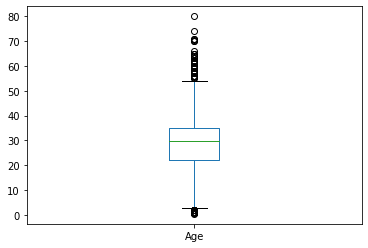

In [ ]:
# 평균값으로 대체
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(train['Age'].mean)
train['Age'].plot.box()

In [ ]:
# 중앙값으로 대체
test['Fare'] = test['Fare'].fillna(train['Fare'].median())
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [ ]:

# 최빈값으로 대체
train['Embarked'] = train['Embarked'].fillna('S')

In [ ]:
# 칼럼 제외
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

# 이상치 처리 방안


In [ ]:
# 이상치 처리 : 이상치는 평균과 표준편차의 정확성을 떨어뜨리므로 처리 필요
# 이상치 기준 : 3 표준편차를 벗어난 경우, 1.5 IQR을 벗어난 경우

max_std = train['Fare'].mean() + 3 * train['Fare'].std()
max_std

181.2844937601173

In [ ]:
IQR = train['Fare'].quantile(.75) - train['Fare'].quantile(.25)
max_quarter = train['Fare'].quantile(.75) + 1.5*IQR
max_quarter

65.6344

In [ ]:
train[(train['Fare'] > max_std)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


In [ ]:
# 값을 max_std로 변경
train.loc[(train['Fare'] > max_std), 'Fare'] = max_std

# 원-핫 인코딩 (one-hot encoding)

In [ ]:
# 원-핫 인코딩 : 컴퓨터는 숫자형만 계산에 사용할 수 있으므로 문자형 등은 모두 숫자형으로 변환이 필요

import pandas as pd
path = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv'
iris = pd.read_csv(path)
iris.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 원-핫 인코딩 : 각 범주를 칼럼으로 바꾼다 -> 범주에 맞게 해당하는 칼럼을 0또는 1로 넣는다
onehot = pd.get_dummies(iris)
onehot.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### 원-핫 인코딩의 종류
1. get_dummies : 데이터 프레임 내의 모든 범주형 데이터를 원핫인코딩 한다.
데이터 타입이 범주형으로 되어있는지 확인이 필요함

2. astype: 변수의 타입을 변경해준다.
범주형으로 바꿔주려면 'category' 타입으로 지정해준다.

In [ ]:
# 특정 컬럼의 데이터 타입 변경
#df[`범주형`] = df[`범주형`].astype(`category`)
#df[`숫자형`] = df[`숫자형`].astype(`float`)

# one-hot encoding 하기
#df_dummies = pd.get_dummies(df)
#print(df_dummies.head())

In [ ]:
# Pclass, Sex, Embarked 변수들을 범주형으로 바꿔주기

# 불필요한 컬럼 제거
train_onehot = train.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# 타입 변경
train_onehot['Pclass'] = train_onehot['Pclass'].astype('category')
train_onehot['Sex'] = train_onehot['Sex'].astype('category')
train_onehot['Embarked'] = train_onehot['Embarked'].astype('category')

# 원핫인코딩
train_onehot = pd.get_dummies(train_onehot)
train_onehot.head(3)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1


# 정규화 (normalize)


In [ ]:
# 정규화 : 컬럼 내의 숫자 scale이 다르면 학습에 방해가 되므로 필요

# minmax normalize (최대최소 정규화) : 분포를 0~1사이의 값으로 바꾼다, 이상치가 있을땐 분포를 제대로 표현할 수 ㅇ벗다.
df_min, df_max = df.min(axis=0), df.max(axis=0)
df_normal = (df - df_min) / (df_max - df_min)
df_normal.head()

In [ ]:
# standardization (표준정규화) : 평균0, 표준편차1로 데이터를 조정, 이상치에 영향을 받지 않는다. 정확히 동일한 척도로 정규화하지는 못한다.
df_mean, df_std = df.mean(axis=0), df.std(axis=0)
df_normal = (df - df_mean) / df_std
df_normal.head()

In [ ]:
# minmax normalize
train_min, train_max = train_onehot.min(axis=0), train_onehot.max(axis=0)
train_normal = (train_onehot - train_min) / (train_min - train_max)
train_normal.head(3)

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.0,-0.271174,-0.125,-0.0,-0.039992,-0.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0,-1.0
1,-1.0,-0.472229,-0.125,-0.0,-0.393212,-1.0,-0.0,-0.0,-1.0,-0.0,-1.0,-0.0,-0.0
2,-1.0,-0.321438,-0.000,-0.0,-0.043716,-0.0,-0.0,-1.0,-1.0,-0.0,-0.0,-0.0,-1.0


In [ ]:
test_min, test_max = train_min.drop(['Survived']), train_max.drop(['Survived'])
test_normal = (train_onehot - test_min) / (test_max - test_min)
test_normal.head(3)

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp,Survived
0,0.271174,0.0,0.0,1.0,0.039992,0.0,0.0,0.0,1.0,0.0,1.0,0.125,NaN
1,0.472229,1.0,0.0,0.0,0.393212,0.0,1.0,0.0,0.0,1.0,0.0,0.125,NaN
2,0.321438,0.0,0.0,1.0,0.043716,0.0,0.0,0.0,1.0,1.0,0.0,0.000,NaN
